In [2]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ferritin/Ferritin results_csv.csv


1- If we could group donor demographic by Fe result, maybe we can determine certain patterns, and manage those donors better. 

For example, we know that frequent donations can reduce ferritin levels.
And this is especially true for female donors (menstruation plus frequent donations).

2- But does the data show this?

3- And does it show for certain age groups? 

4- Or more specifically in certain race groups, etc., etc.  

In the broader picture:

5- What are the current ferritin levels within our donor population?

6- Are our donor ferritin levels adversely affected by frequent donations?  

If so, what can we do about it? Give them Fe supplements, increase frequency between donations, etc, etc

Our ferritin categories:
• ≤ 5.9 µg/L (Very low)
• Between 6 and ≤15.9 µg/L (Low)
• > 501 but ≤ 1000 µg/L (High)
• > 1001 µg/L (Very high)
• Donors with results between 16 and 500 µg/L, are considered to have “normal” Fe levels (they do not receive an SMS).


In [3]:

# NOTES:

# create cols for race and sex, group and rh
# Nice to have:
#    Hb data, to serve as additional feature to compare data
#    clinic keys, to define medical and therapuetic donor categories and plot clinics geographic data




## Load Data

In [4]:
df = pd.read_csv('../input/ferritin/Ferritin results_csv.csv')

## View Data

In [5]:
df.head(10)

# code to find donor data with ALPHA.KEY #
# df[df['ALPHA.KEY']=='BASSOCA0030']

,_ID,ALPHA.KEY,COBAS.FERRITIN.RATIO,RACE,GROUPRH,AGE,BLEEDPAN,DATE.BLED,NOD,SMS.TEMPLATE,FERRITIN.SMS.DATE,THERAP
0,11994897,NIEMALJ0030,1168,2.0,O POS,63.0,CAN,01/03/2022,13.0,A5,02/03/2022,MED-F
1,12028078,SWARTJN0070,2000,1.0,B POS,54.0,CCF,27/05/2022,12.0,NaN,NaN,NaN
2,11994280,FARGHS00010,1572,1.0,O POS,58.0,MB4,03/03/2022,19.0,E4,03/03/2022,MED-F
3,12037507,CONRAL00420,2000,2.0,A POS,56.0,CCB,20/06/2022,71.0,NaN,NaN,MED
4,50011361,COLLIS00290,1222,4.0,O POS,32.0,NC5,04/03/2022,1.0,E4,07/03/2022,NaN
5,12011365,SMITHE00270,1263,1.0,O POS,36.0,EAV,01/06/2022,16.0,A4,02/06/2022,NaN
6,11936157,MYBUREF0010,1174,1.0,O POS,45.0,CAL,02/03/2022,3.0,A4,03/03/2022,NaN
7,11997920,WIGGIM00030,1249,1.0,B POS,44.0,BAJ,17/05/2022,6.0,A5,18/05/2022,MED-F
8,11997180,JUSTUJS0020,1294,1.0,A POS,59.0,NC1,14/03/2022,3.0,E4,15/03/2022,NaN
9,12002535,HAYESPP0010,1676,1.0,NaN,NaN,MB1,14/03/2022,NaN,E5,15/03/2022,PHE-F


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59581 entries, 0 to 59580
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _ID                   59581 non-null  int64  
 1   ALPHA.KEY             59575 non-null  object 
 2   COBAS.FERRITIN.RATIO  59581 non-null  object 
 3   RACE                  59575 non-null  float64
 4   GROUPRH               57676 non-null  object 
 5   AGE                   57673 non-null  float64
 6   BLEEDPAN              59581 non-null  object 
 7   DATE.BLED             59581 non-null  object 
 8   NOD                   57677 non-null  float64
 9   SMS.TEMPLATE          9838 non-null   object 
 10  FERRITIN.SMS.DATE     9838 non-null   object 
 11  THERAP                1687 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.5+ MB


In [7]:
df.isnull().sum()

_ID                         0
ALPHA.KEY                   6
COBAS.FERRITIN.RATIO        0
RACE                        6
GROUPRH                  1905
AGE                      1908
BLEEDPAN                    0
DATE.BLED                   0
NOD                      1904
SMS.TEMPLATE            49743
FERRITIN.SMS.DATE       49743
THERAP                  57894
dtype: int64

<AxesSubplot:>

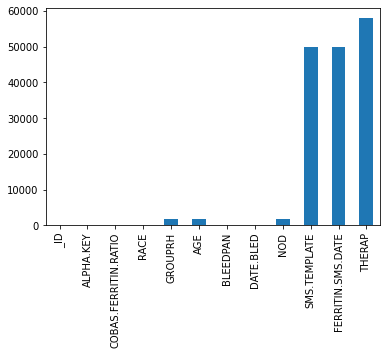

In [8]:
df.isna().sum().plot(kind='bar')

In [9]:
df['COBAS.FERRITIN.RATIO'].value_counts()

102    184
103    163
104    156
101    154
106    153
      ... 
660      1
578      1
705      1
480      1
994      1
Name: COBAS.FERRITIN.RATIO, Length: 2381, dtype: int64

<AxesSubplot:>

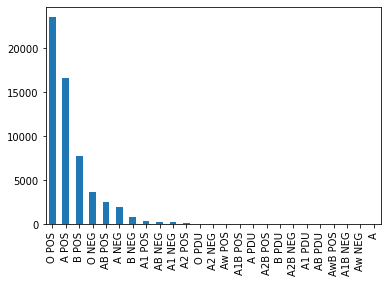

In [10]:
df['GROUPRH'].value_counts().plot(kind='bar')

<AxesSubplot:>

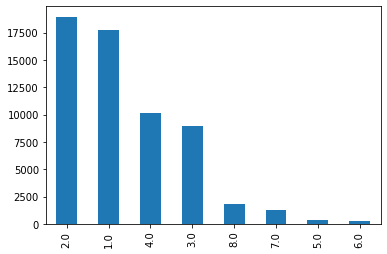

In [11]:
df['RACE'].value_counts().plot(kind='bar')

<AxesSubplot:>

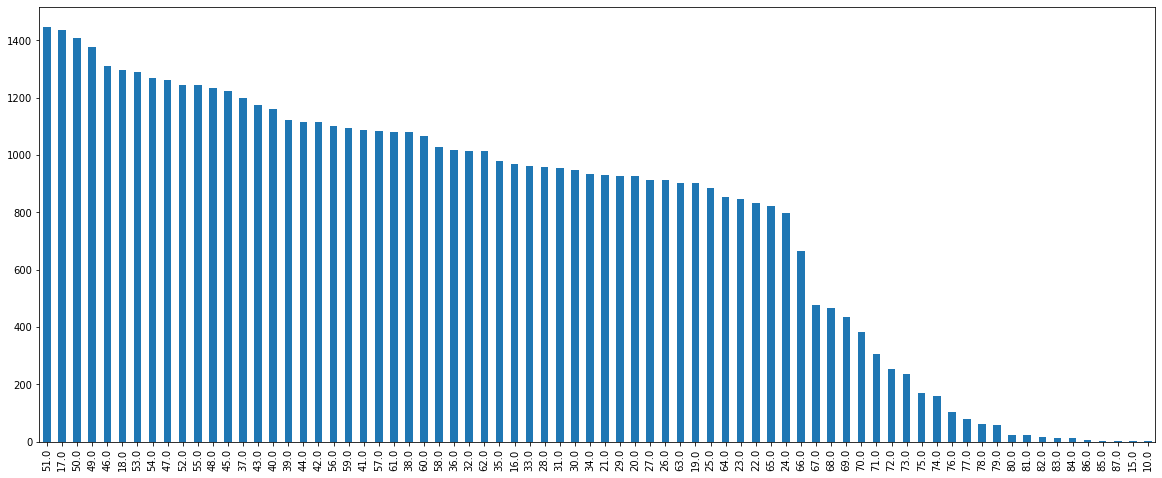

In [12]:
df['AGE'].value_counts().plot(kind='bar', figsize=(20, 8))

In [13]:
df.describe()

,_ID,RACE,AGE,NOD
count,5.958100e+04,59575.000000,57673.000000,57677.000000
mean,1.669070e+07,2.521695,43.136268,31.299339
std,1.249320e+07,1.618661,15.478436,40.711577
min,1.137877e+07,1.000000,10.000000,-1.000000
25%,1.200101e+07,1.000000,30.000000,4.000000
50%,1.201688e+07,2.000000,44.000000,15.000000
75%,1.203285e+07,3.000000,55.000000,42.000000
max,5.003540e+07,8.000000,87.000000,383.000000


<AxesSubplot:>

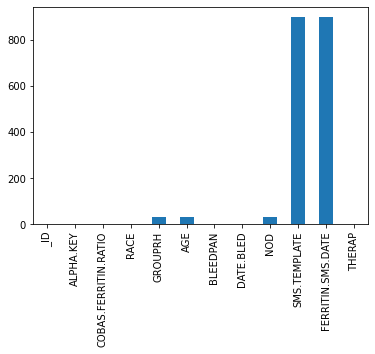

In [14]:
dx = df[df["THERAP"].notnull()]
dx.isna().sum().plot(kind='bar')


In [15]:
# Dataframe to select therapeutic donors
# drop columns
df1_1 = df.drop(['SMS.TEMPLATE', 'FERRITIN.SMS.DATE'], axis=1)

# rename remaining columns
df1_1.columns = ['sample_id', 'donor_code', 'ferritin_ratio','race', 'group_rh', 'age', 'clinic_code', 'date_bled', 'donations', 'therap']

# convert 'ferritin_ratio' to float datatype, non-numeric values coerced to NaN
df1_1['ferritin_ratio'] = pd.to_numeric(df1_1['ferritin_ratio'], errors='coerce')

# convert 'date_bled' to float datetime datatype
df1_1['date_bled'] = pd.to_datetime(df1_1['date_bled'], dayfirst=True)

#drop NaN values
df1_1 = df1_1.dropna()

# save df to csv file
df1_1.to_csv('clean_df1_1')

df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 0 to 59579
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       1653 non-null   int64         
 1   donor_code      1653 non-null   object        
 2   ferritin_ratio  1653 non-null   float64       
 3   race            1653 non-null   float64       
 4   group_rh        1653 non-null   object        
 5   age             1653 non-null   float64       
 6   clinic_code     1653 non-null   object        
 7   date_bled       1653 non-null   datetime64[ns]
 8   donations       1653 non-null   float64       
 9   therap          1653 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 142.1+ KB


## Dataframe including all donors (therapeutic donors, AFN, TTD, etc)

In [16]:
# drop columns
df1 = df.drop(['SMS.TEMPLATE', 'FERRITIN.SMS.DATE', 'THERAP'], axis=1)

# rename remaining columns
df1.columns = ['sample_id', 'donor_code', 'ferritin_ratio','race', 'group_rh', 'age', 'clinic_code', 'date_bled', 'donations']

# convert 'ferritin_ratio' to float datatype, non-numeric values coerced to NaN
df1['ferritin_ratio'] = pd.to_numeric(df1['ferritin_ratio'], errors='coerce')

# convert 'date_bled' to float datetime datatype
df1['date_bled'] = pd.to_datetime(df1['date_bled'], dayfirst=True)

#drop NaN values
df1 = df1.dropna()

# save df to csv file
df1.to_csv('clean_df1')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57666 entries, 0 to 59580
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       57666 non-null  int64         
 1   donor_code      57666 non-null  object        
 2   ferritin_ratio  57666 non-null  float64       
 3   race            57666 non-null  float64       
 4   group_rh        57666 non-null  object        
 5   age             57666 non-null  float64       
 6   clinic_code     57666 non-null  object        
 7   date_bled       57666 non-null  datetime64[ns]
 8   donations       57666 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.4+ MB


In [17]:
# view df first 5 rows
df1.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations
0,11994897,NIEMALJ0030,1168.0,2.0,O POS,63.0,CAN,2022-03-01,13.0
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0
2,11994280,FARGHS00010,1572.0,1.0,O POS,58.0,MB4,2022-03-03,19.0
3,12037507,CONRAL00420,2000.0,2.0,A POS,56.0,CCB,2022-06-20,71.0
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0


## Dataframe excluding donors labelled as Therapeutic, AFN , MED and TTD

In [18]:
df['THERAP'].value_counts()

MED      766
MED-H    329
MED-F    289
PHE-H    134
PHE-C     86
PHE-F     75
PHE        8
Name: THERAP, dtype: int64

In [19]:
df_excl = df[df['BLEEDPAN'].isin(['MED', 'AFN', 'TTD'])]
df_excl['BLEEDPAN'].value_counts()

AFN    827
MED    258
TTD     82
Name: BLEEDPAN, dtype: int64

In [20]:
# remove therapeutic donors from dataset 
theraps = df[df['THERAP'].notnull()].index
df2 = df.drop(theraps)

# remove AFN donors from dataset
afns = df[df['BLEEDPAN'] == 'AFN'].index
df2 = df2.drop(afns, errors='ignore')

# remove MED donors from dataset
med = df[df['BLEEDPAN'] == 'MED'].index
df2 = df2.drop(med, errors='ignore')

# remove TTD donors from dataset
ttd = df[df['BLEEDPAN'] == 'TTD'].index
df2 = df2.drop(ttd, errors='ignore')

# drop columns
df2 = df2.drop(['SMS.TEMPLATE', 'FERRITIN.SMS.DATE', 'THERAP'], axis=1)

# convert datatype
df2['COBAS.FERRITIN.RATIO'] = pd.to_numeric(df2['COBAS.FERRITIN.RATIO'], errors='coerce')

# convert datatype
df2['RACE'] = df2['RACE'].astype(str)

# convert datatype
df2['DATE.BLED'] = pd.to_datetime(df2['DATE.BLED'], dayfirst=True)

# drop NaN values
df2 = df2.dropna()

# rename columns
df2.columns = ['sample_id', 'donor_code', 'ferritin_ratio','race', 'group_rh', 'age', 'clinic_code', 'date_bled', 'donations']

df2.to_csv('clean_df2')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55111 entries, 1 to 59580
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       55111 non-null  int64         
 1   donor_code      55111 non-null  object        
 2   ferritin_ratio  55111 non-null  float64       
 3   race            55111 non-null  object        
 4   group_rh        55111 non-null  object        
 5   age             55111 non-null  float64       
 6   clinic_code     55111 non-null  object        
 7   date_bled       55111 non-null  datetime64[ns]
 8   donations       55111 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0


## Dataframe for export to Tableau

In [22]:
# for Tableau

tableau = df.drop(['SMS.TEMPLATE', 'FERRITIN.SMS.DATE', 'THERAP'], axis=1)

tableau.columns = ['sample_id', 'donor_code', 'ferritin_ratio','race', 'group_rh', 'age', 'clinic_code', 'date_bled', 'donations']

tableau = tableau.dropna()

tableau.to_csv('ferritin.csv')

tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57667 entries, 0 to 59580
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       57667 non-null  int64  
 1   donor_code      57667 non-null  object 
 2   ferritin_ratio  57667 non-null  object 
 3   race            57667 non-null  float64
 4   group_rh        57667 non-null  object 
 5   age             57667 non-null  float64
 6   clinic_code     57667 non-null  object 
 7   date_bled       57667 non-null  object 
 8   donations       57667 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.4+ MB


### EDA

In [23]:
df1.describe()

# ls = clean_df_therap.describe()
# ls.iloc[[1]]

,sample_id,ferritin_ratio,race,age,donations
count,5.766600e+04,57666.000000,57666.000000,57666.000000,57666.000000
mean,1.612611e+07,81.363308,2.507439,43.137447,31.300645
std,1.181384e+07,129.688539,1.603783,15.478677,40.712636
min,1.137877e+07,1.350000,1.000000,10.000000,-1.000000
25%,1.200092e+07,22.500000,1.000000,30.000000,4.000000
50%,1.201653e+07,44.700000,2.000000,44.000000,15.000000
75%,1.203209e+07,89.900000,3.000000,55.000000,42.000000
max,5.003540e+07,4637.000000,8.000000,87.000000,383.000000


In [24]:
df2.describe()

,sample_id,ferritin_ratio,age,donations
count,5.511100e+04,55111.000000,55111.000000,55111.000000
mean,1.623304e+07,74.865180,42.563045,30.155831
std,1.194597e+07,101.894063,15.362516,39.016951
min,1.137877e+07,1.350000,10.000000,-1.000000
25%,1.200176e+07,22.100000,30.000000,4.000000
50%,1.201709e+07,43.700000,43.000000,14.000000
75%,1.203239e+07,86.900000,55.000000,41.000000
max,5.003540e+07,2107.000000,87.000000,327.000000


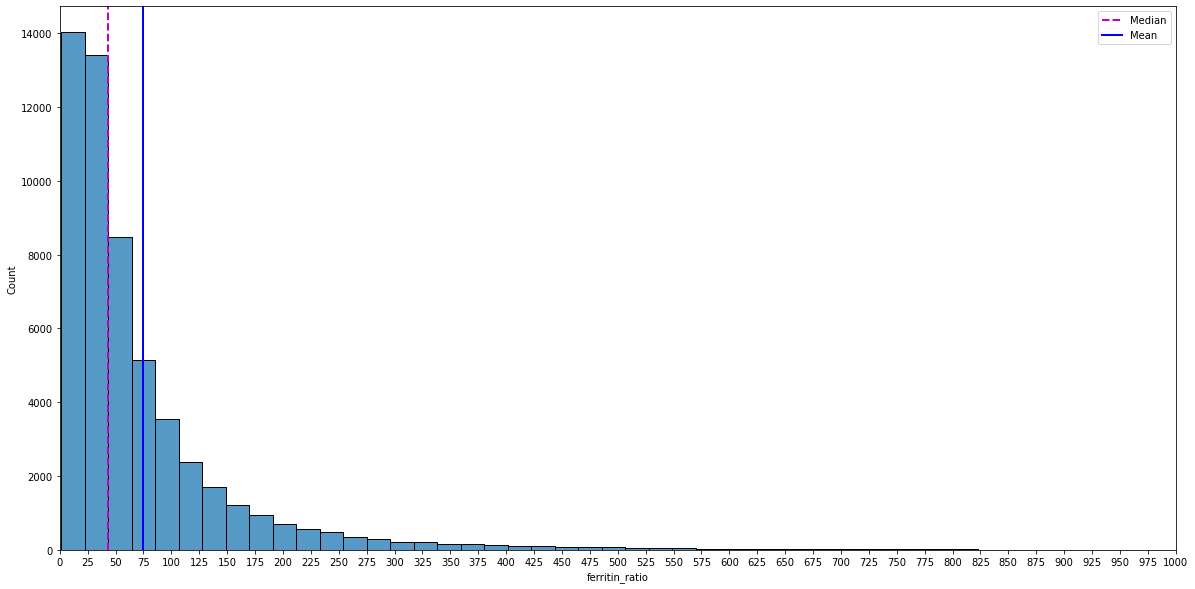

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

sns.histplot(x=df2['ferritin_ratio'], bins=100, ax=ax)

ax.set(xticks=(range(0,2100, 25)), xlim =(0,1000))

ax.axvline(x=df2['ferritin_ratio'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df2['ferritin_ratio'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

ax.legend()
plt.show()



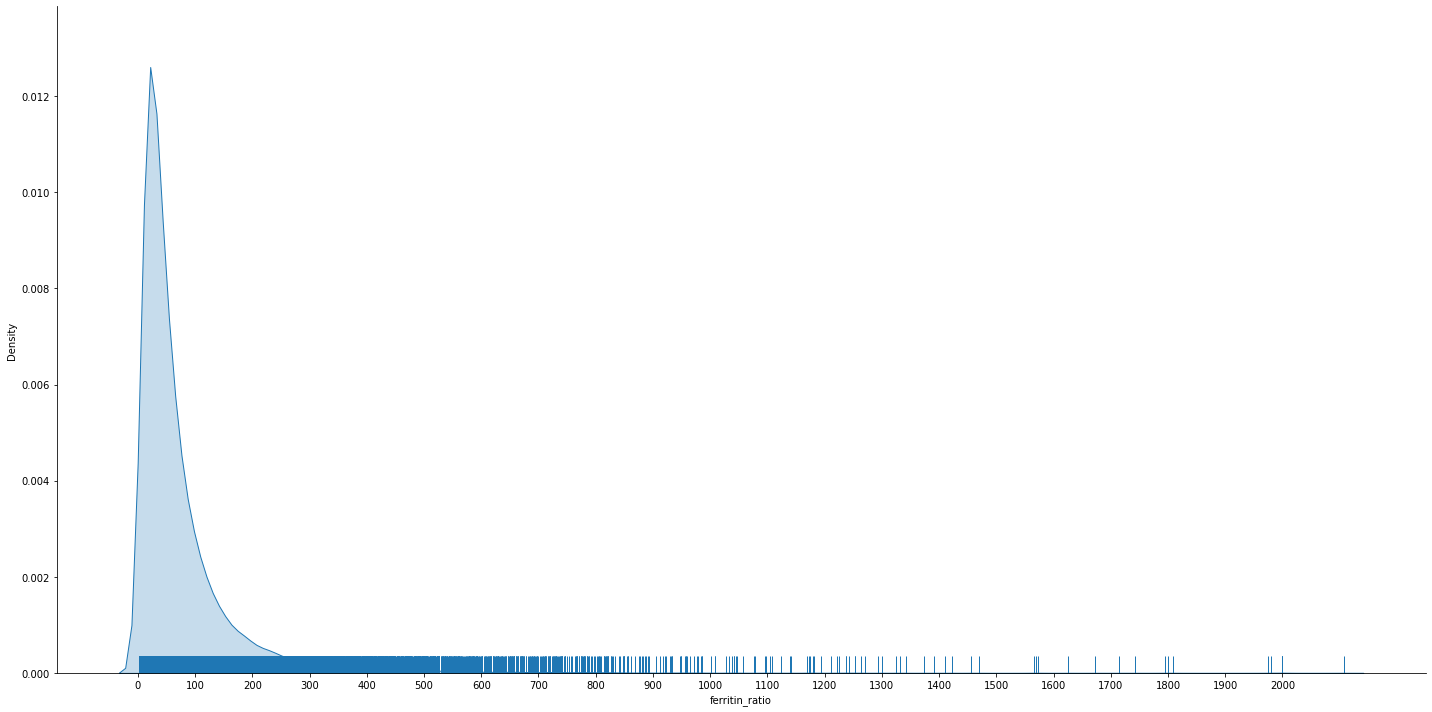

In [26]:

g= sns.displot(x=df2['ferritin_ratio'],kind='kde',rug=True,fill=True, height=10,aspect=2)

g.set(xticks=(range(0,2100, 100)))


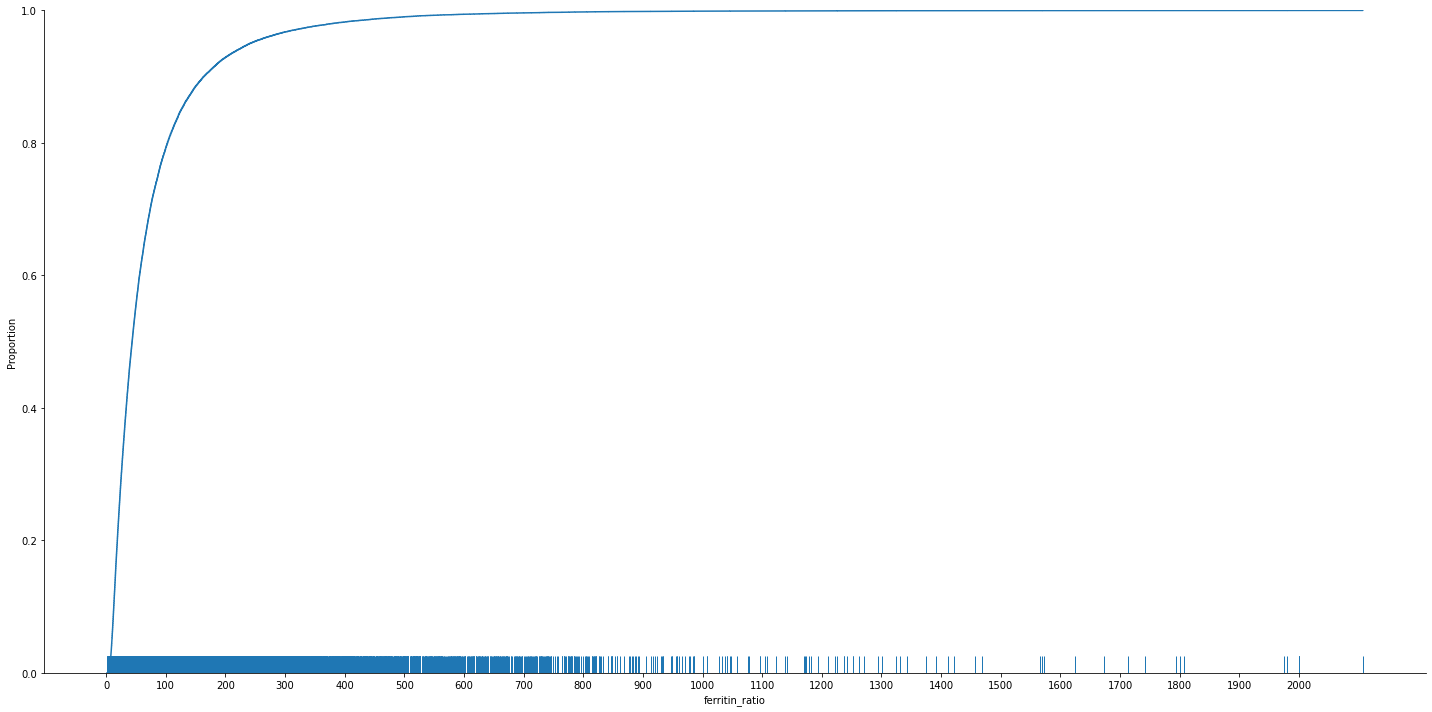

In [27]:
# ecdfplot shows cumulative distribution of data
g= sns.displot(x=df2['ferritin_ratio'],kind='ecdf',rug=True, height=10,aspect=2)
g.set(xticks=(range(0,2100, 100)))


### Plot Ferritin levels in the donor population

In [28]:
def create_plot(axes, x, y, xlabel,ylabel):
    """ function to plot data """

    axes.plot(x, y, ls='None', marker='o')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

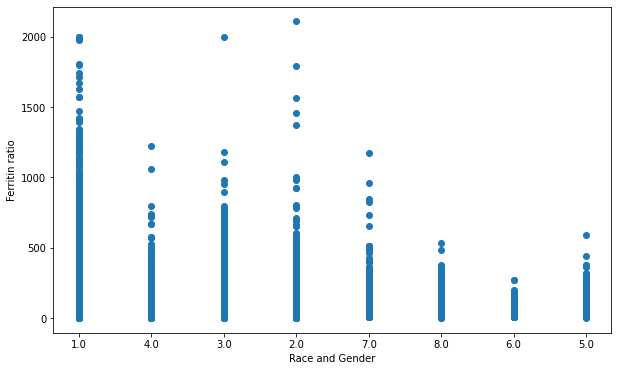

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

create_plot(ax, df2["race"], df2["ferritin_ratio"], 'Race and Gender', 'Ferritin ratio')

In [30]:
df2.groupby('age')["ferritin_ratio"].agg(np.mean)

age
10.0    120.000000
15.0     37.150000
16.0     47.417857
17.0     46.637591
18.0     53.756605
           ...    
83.0     69.481818
84.0     49.590000
85.0     81.600000
86.0     34.500000
87.0     21.100000
Name: ferritin_ratio, Length: 74, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

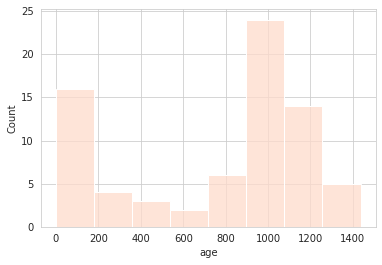

In [31]:
sns.set_style('whitegrid')
sns.set_palette('Reds')

sns.histplot(df2['age'].value_counts(sort=False))

In [32]:
df2['age'].value_counts(sort=False).index


Float64Index([54.0, 32.0, 36.0, 45.0, 59.0, 44.0, 51.0, 71.0, 37.0, 42.0, 77.0,
              52.0, 30.0, 57.0, 47.0, 46.0, 17.0, 58.0, 65.0, 40.0, 43.0, 33.0,
              79.0, 73.0, 62.0, 55.0, 49.0, 50.0, 41.0, 27.0, 25.0, 60.0, 31.0,
              64.0, 66.0, 24.0, 61.0, 68.0, 48.0, 56.0, 23.0, 29.0, 16.0, 63.0,
              21.0, 34.0, 39.0, 18.0, 28.0, 38.0, 67.0, 53.0, 69.0, 22.0, 26.0,
              35.0, 19.0, 72.0, 70.0, 20.0, 78.0, 82.0, 74.0, 76.0, 75.0, 80.0,
              86.0, 81.0, 84.0, 83.0, 15.0, 10.0, 85.0, 87.0],
             dtype='float64')

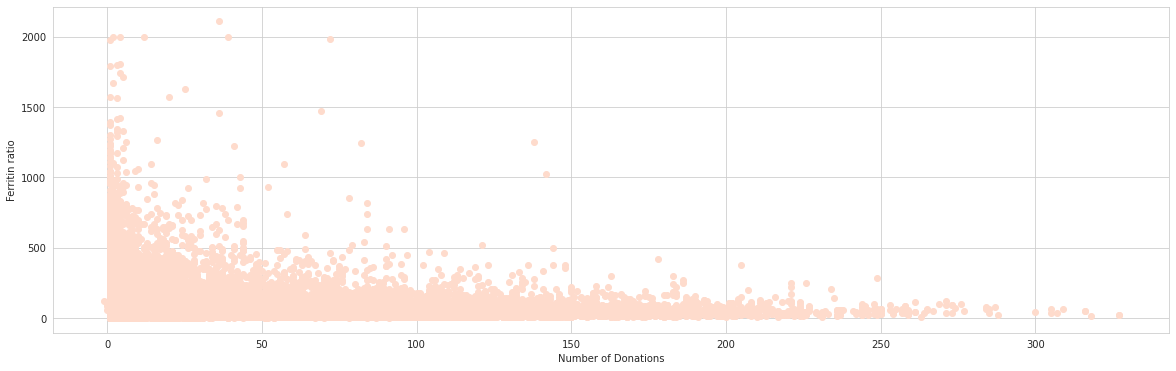

In [33]:
fig, ax = plt.subplots(figsize=(20, 6))

create_plot(ax, df2["donations"], df2["ferritin_ratio"], 'Number of Donations', 'Ferritin ratio')

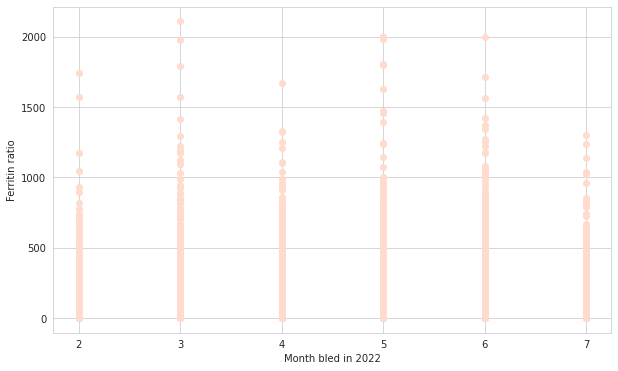

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

create_plot(ax, df2["date_bled"].dt.month, df2["ferritin_ratio"], 'Month bled in 2022', 'Ferritin ratio')

### FERRITIN TO CATEGORIES

In [35]:
def to_cat(x):
    """function to convert ferritin ratio into defined categories"""
    if x <= 5.9:
        return 'very low'
    elif x > 6 and x <=15.9:
        return 'low'
    elif x >= 16 and x<=500:
        return 'normal'
    elif x >=501 and x <=1000:
        return 'high'
    else:
        return 'very high'

In [36]:
ferritin_cat = df2['ferritin_ratio'].apply(to_cat)

ferritin_cat.value_counts()

normal       46159
low           7991
high           466
very low       408
very high       87
Name: ferritin_ratio, dtype: int64

In [37]:
df2['ferritin_cat'] = ferritin_cat

df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,very high
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0,very high
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,very high
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,very high
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,very high


<AxesSubplot:xlabel='ferritin_cat', ylabel='count'>

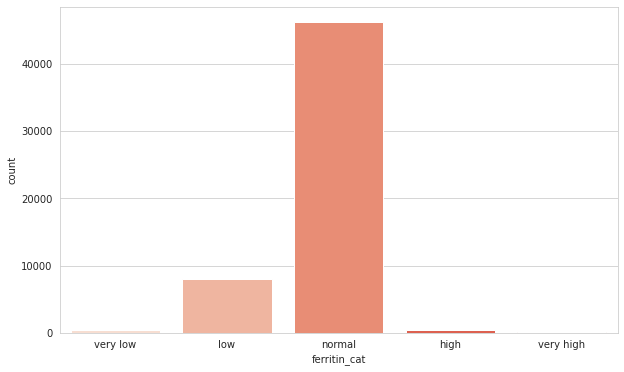

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x=df2['ferritin_cat'], order=['very low', 'low', 'normal','high', 'very high'])

### DONORS WHO DONATED MORE THAN ONCE IN THE STUDY PERIOD.

In [39]:
donor_code_count = df2["donor_code"].value_counts()

# rename index for join
donor_code_count.rename("donor_code") 

# join Series(donor_code_count) to df(clean_df_non_therap)
df2 = df2.join(donor_code_count, on='donor_code',how='left', rsuffix='_count') 

df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,very high,1
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0,very high,1
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,very high,1
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,very high,2
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,very high,2


In [40]:
df2["donor_code_count"].value_counts()

1     29802
2     21014
3      3492
4       300
5       160
6       126
8        72
7        70
9        45
10       30
Name: donor_code_count, dtype: int64

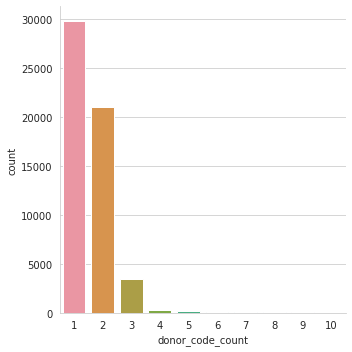

In [41]:
sns.catplot(x='donor_code_count', data=df2, kind='count')

Text(0, 0.5, 'average ferritin ratio')

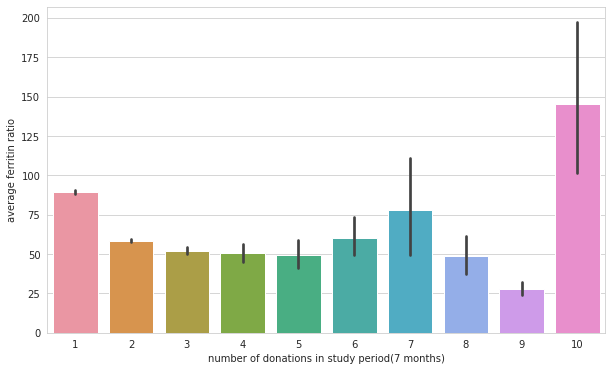

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df2, x='donor_code_count', y='ferritin_ratio')
ax.set_xlabel('number of donations in study period(7 months)')
ax.set_ylabel('average ferritin ratio')

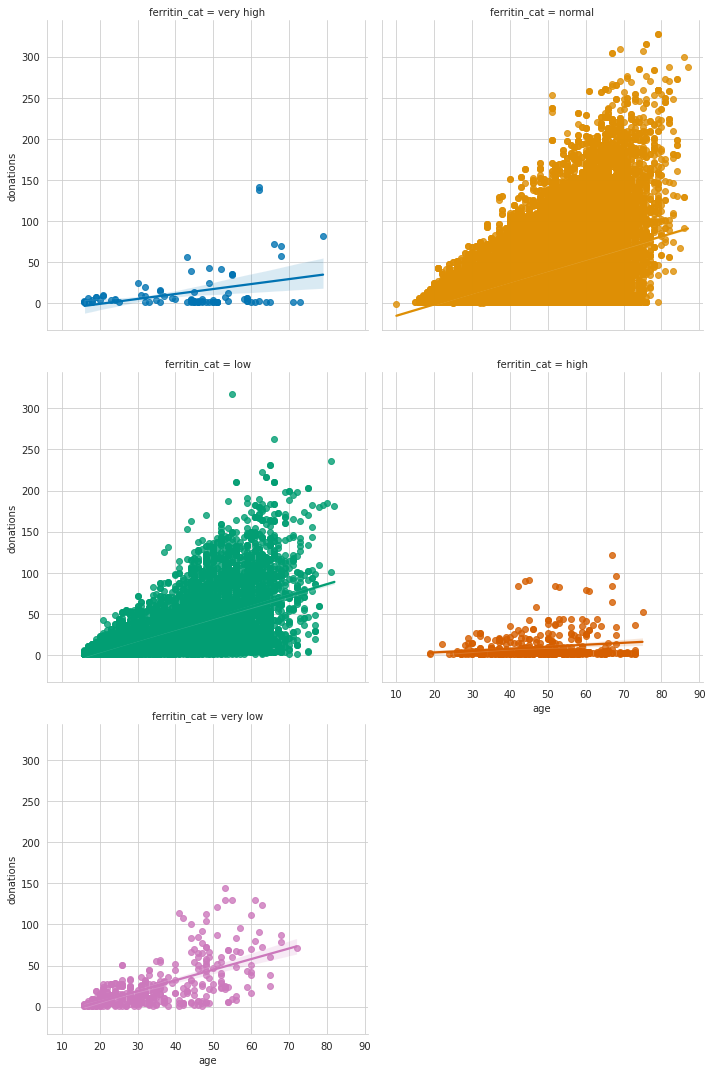

In [43]:
sns.set_palette("colorblind")
sns.lmplot(data=df2, y='donations',x='age', hue='ferritin_cat', col='ferritin_cat', col_wrap=2)

<AxesSubplot:>

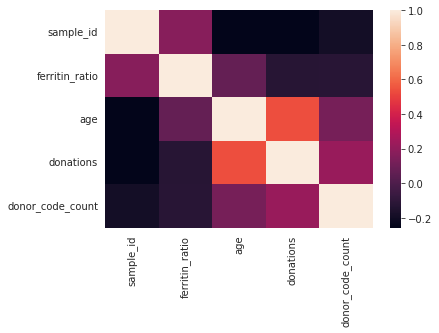

In [44]:
sns.heatmap(df2.corr())

<AxesSubplot:xlabel='donor_code_count', ylabel='race'>

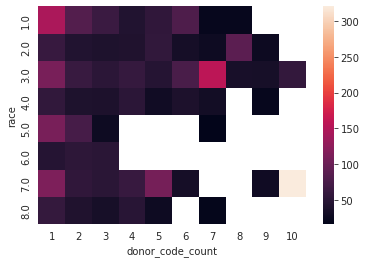

In [45]:
sns.heatmap(pd.crosstab(df2["race"], df2["donor_code_count"], values=df2["ferritin_ratio"], aggfunc="mean"))

#### FERRITIN AND AGE

In [46]:
df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,very high,1
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0,very high,1
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,very high,1
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,very high,2
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,very high,2


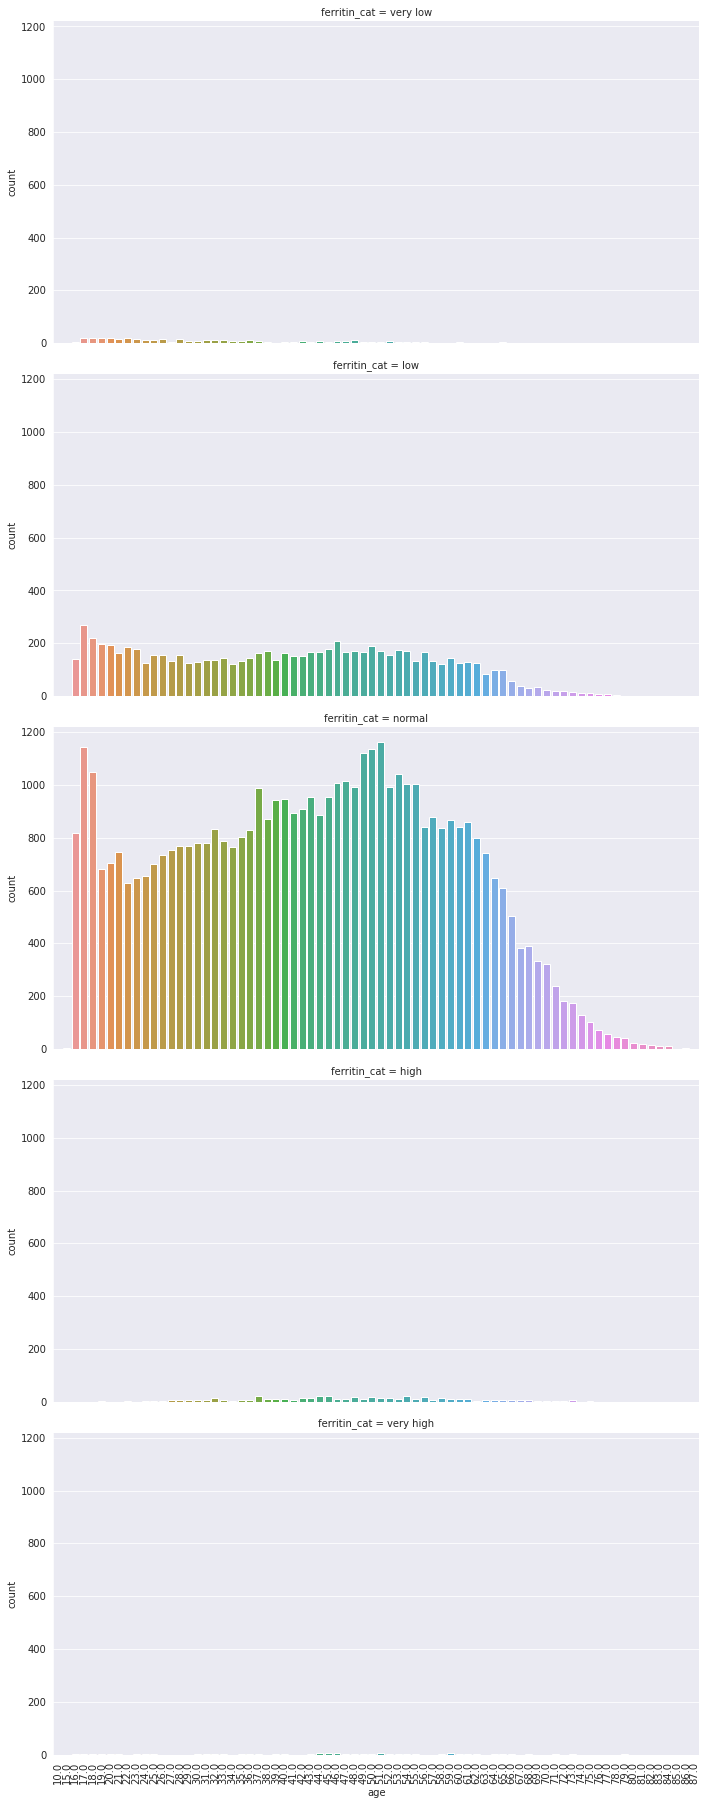

In [47]:
sns.set_style('darkgrid')
sns.catplot(x='age', data=df2, col='ferritin_cat', col_wrap=1, kind='count', height=5, aspect=2, col_order=['very low', 'low', 'normal','high', 'very high'])

plt.xticks(rotation=90)

plt.show()

In [48]:
df2.groupby(['age'])["ferritin_ratio"].agg([max, min, np.mean, np.median])

,max,min,mean,median
age,,,,
10.0,120.0,120.00,120.000000,120.00
15.0,50.0,24.30,37.150000,37.15
16.0,301.0,4.06,47.417857,37.50
17.0,379.0,3.00,46.637591,34.20
18.0,444.0,1.79,53.756605,38.40
...,...,...,...,...
83.0,166.0,22.50,69.481818,50.50
84.0,96.1,20.30,49.590000,41.20
85.0,81.6,81.60,81.600000,81.60


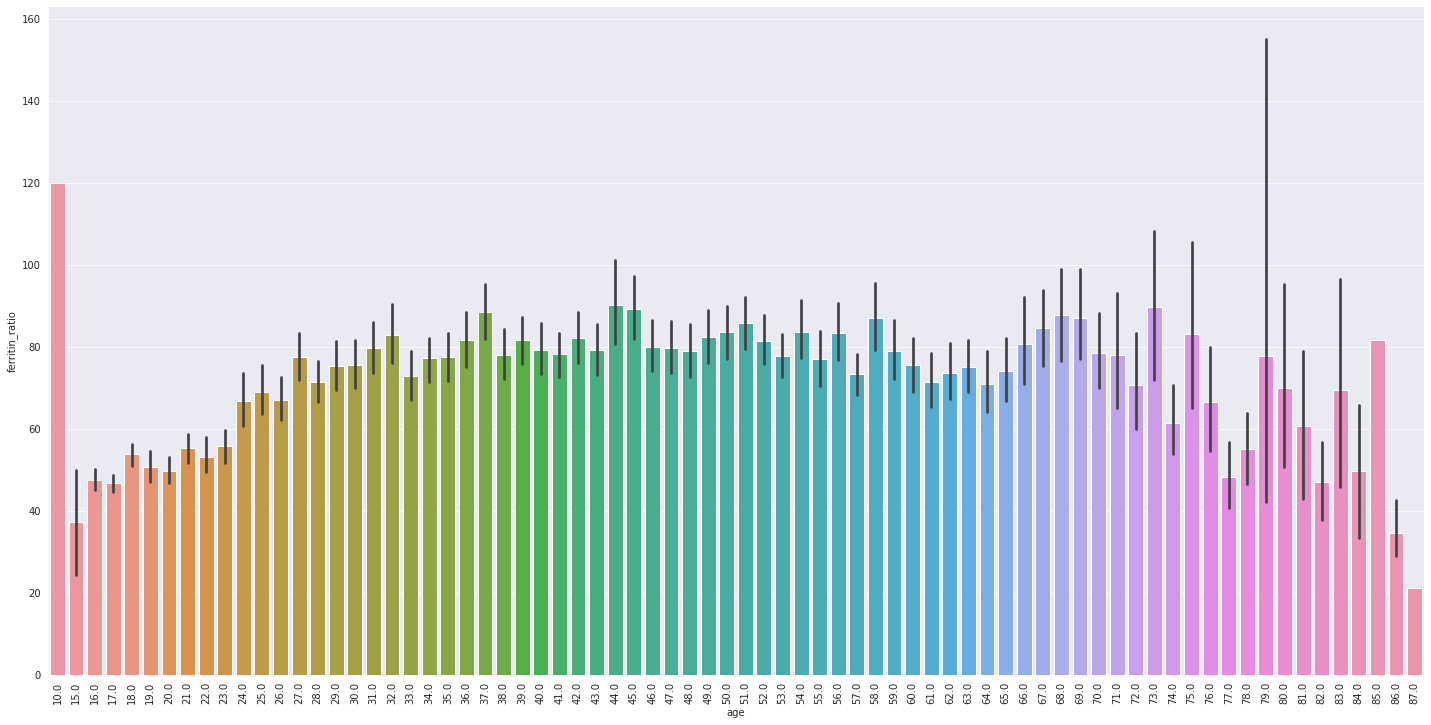

In [49]:
sns.catplot(x='age', y='ferritin_ratio',data=df2, kind='bar', height=10, aspect=2)

plt.xticks(rotation=90)

plt.show()

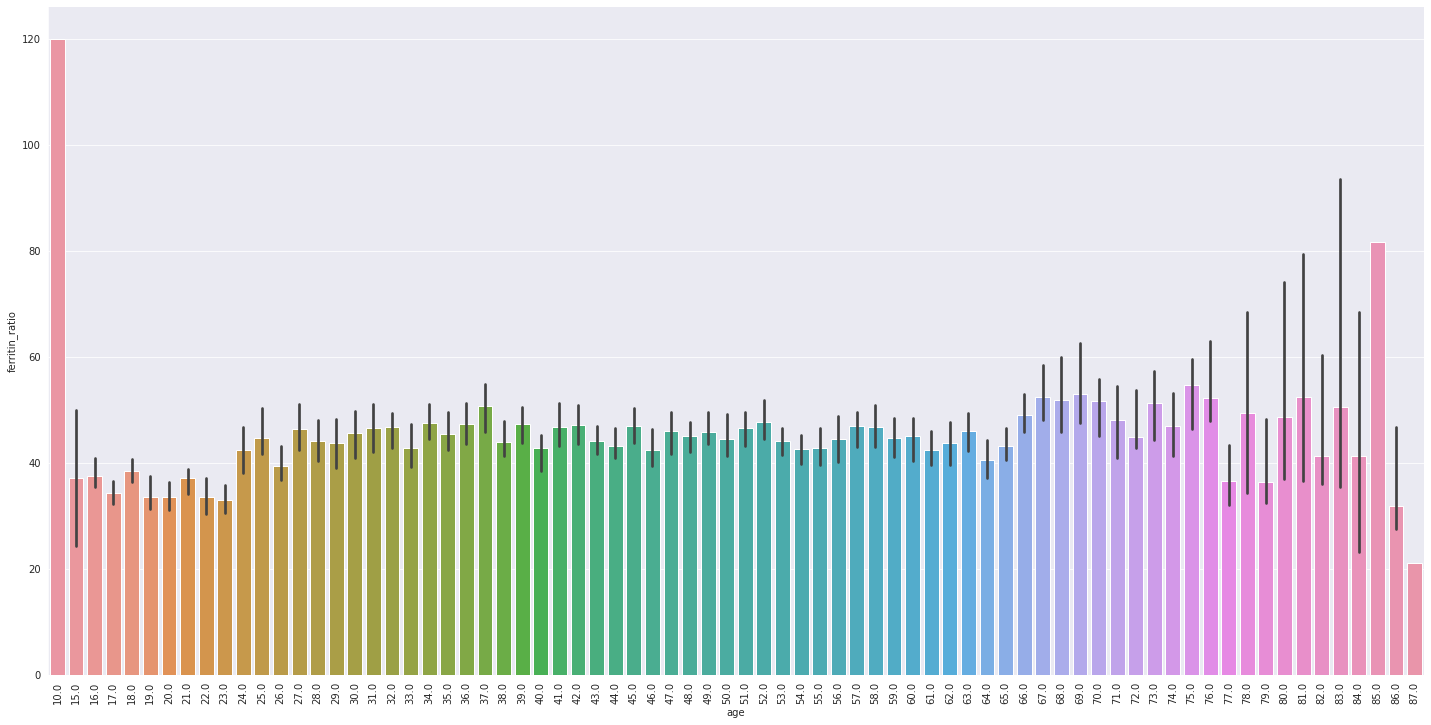

In [50]:
sns.catplot(x='age', y='ferritin_ratio',data=df2, kind='bar', height=10, aspect=2, estimator=np.median)

plt.xticks(rotation=90)

plt.show()

#### FERRITIN AND RACE

In [51]:
df2.groupby(['race'])["ferritin_ratio"].agg([max, min, np.mean, np.median])

,max,min,mean,median
race,,,,
1.0,2000.0,2.15,109.928867,64.0
2.0,2107.0,1.35,52.602377,34.1
3.0,2000.0,3.57,86.724790,54.2
4.0,1222.0,2.27,50.239581,32.3
5.0,592.0,3.73,91.260538,63.5
6.0,269.0,5.12,48.416988,35.3
7.0,1170.0,4.96,92.807130,61.1
8.0,534.0,4.30,54.059341,37.0


In [52]:
df=df2.groupby(['race'])["ferritin_cat"].value_counts()
df.index

MultiIndex([('1.0',    'normal'),
            ('1.0',       'low'),
            ('1.0',      'high'),
            ('1.0', 'very high'),
            ('1.0',  'very low'),
            ('2.0',    'normal'),
            ('2.0',       'low'),
            ('2.0',  'very low'),
            ('2.0',      'high'),
            ('2.0', 'very high'),
            ('3.0',    'normal'),
            ('3.0',       'low'),
            ('3.0',      'high'),
            ('3.0',  'very low'),
            ('3.0', 'very high'),
            ('4.0',    'normal'),
            ('4.0',       'low'),
            ('4.0',  'very low'),
            ('4.0',      'high'),
            ('4.0', 'very high'),
            ('5.0',    'normal'),
            ('5.0',       'low'),
            ('5.0',  'very low'),
            ('5.0',      'high'),
            ('6.0',    'normal'),
            ('6.0',       'low'),
            ('6.0',  'very low'),
            ('7.0',    'normal'),
            ('7.0',       'low'),
            ('

<AxesSubplot:xlabel='ferritin_cat', ylabel='count'>

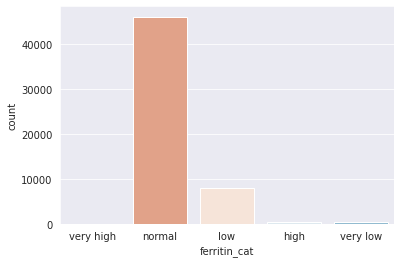

In [53]:
sns.set_palette("RdBu")
sns.countplot(x='ferritin_cat', data= df2)

<AxesSubplot:xlabel='race', ylabel='Count'>

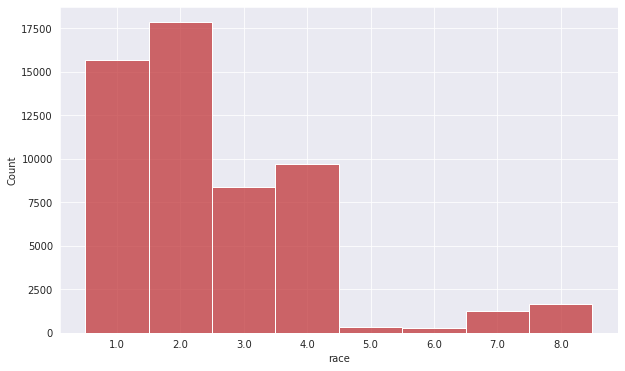

In [54]:
# sort values to be in order in plot
df2['race'].values.sort()

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df2['race'])

<AxesSubplot:xlabel='race', ylabel='count'>

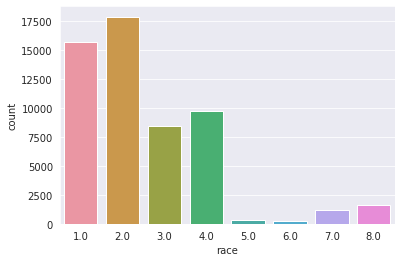

In [55]:
sns.countplot(x='race', data= df2)

<AxesSubplot:xlabel='race', ylabel='age'>

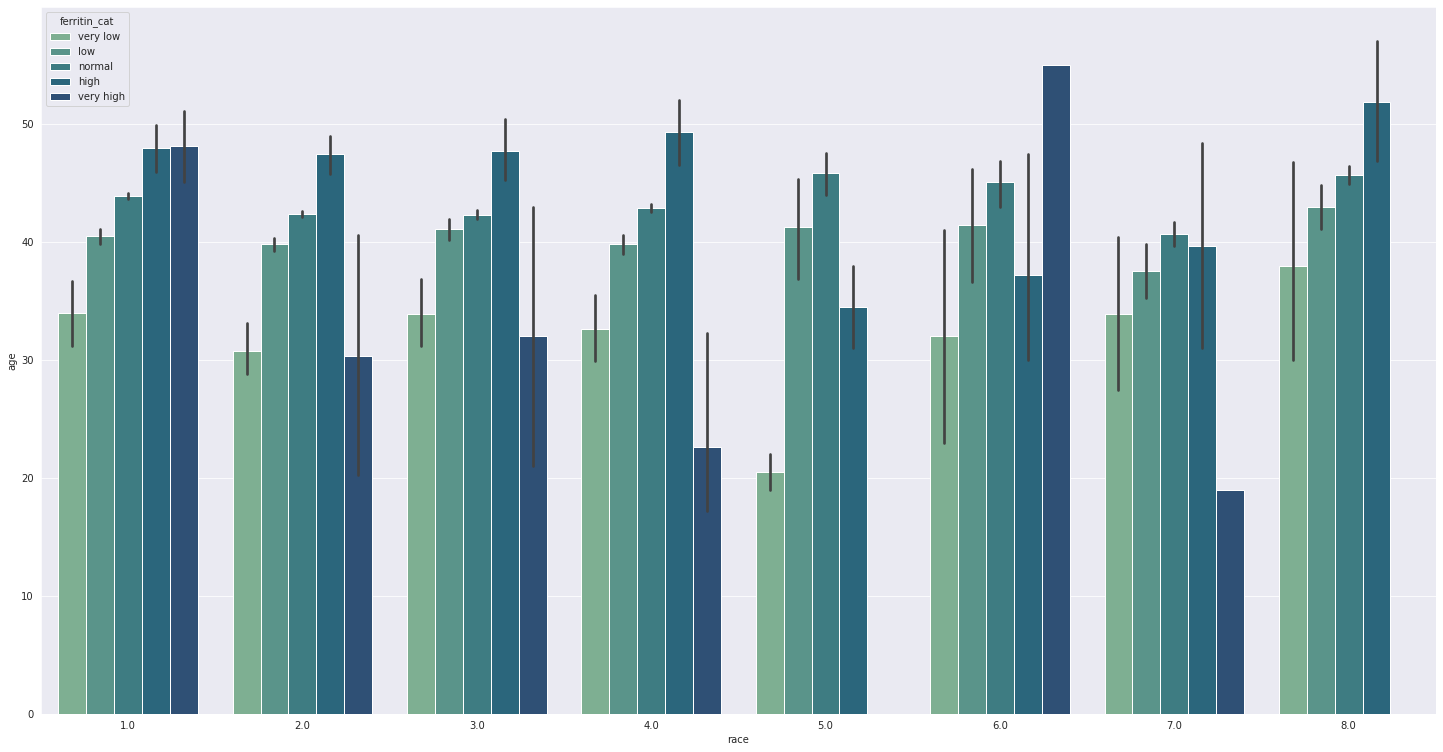

In [56]:
fig, ax = plt.subplots(figsize=(25, 13))

sns.barplot(x='race', y='age',hue = 'ferritin_cat', hue_order = ['very low','low', 'normal', 'high', 'very high'], palette='crest',data=df2)

<AxesSubplot:xlabel='race', ylabel='donor_code_count'>

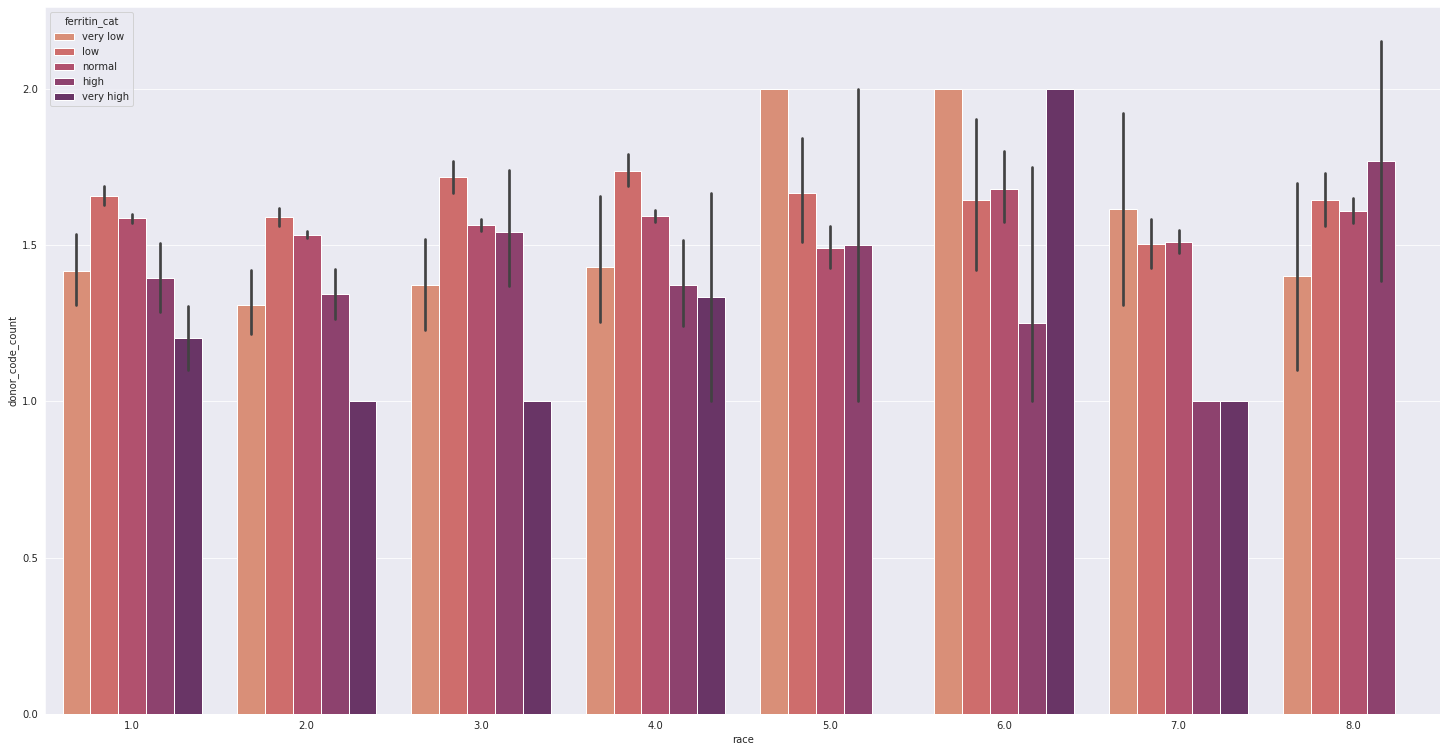

In [57]:
fig, ax = plt.subplots(figsize=(25, 13))

sns.barplot(x='race', y='donor_code_count',hue = 'ferritin_cat', hue_order = ['very low','low', 'normal', 'high', 'very high'], palette='flare',data=df2)

<AxesSubplot:xlabel='race', ylabel='ferritin_ratio'>

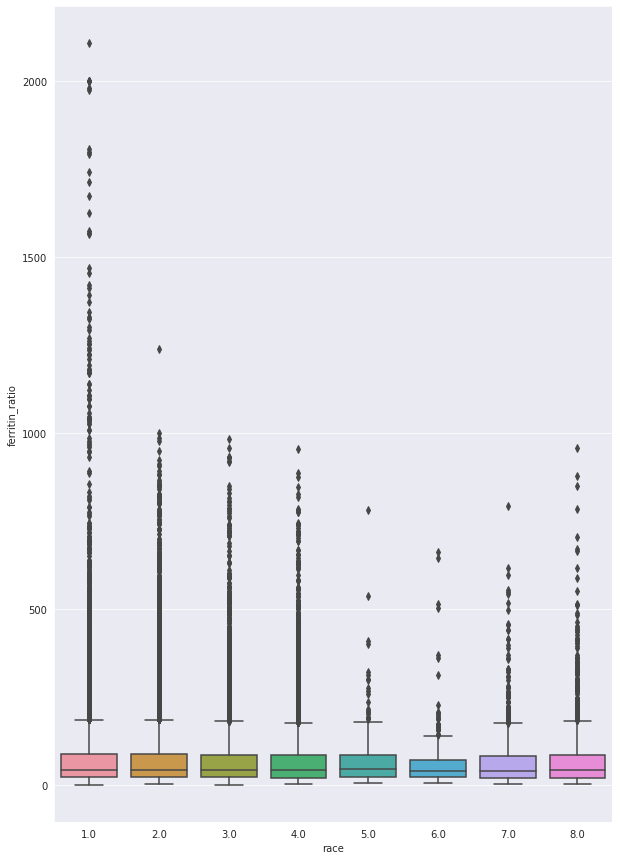

In [58]:
fig, ax = plt.subplots(figsize=(10, 15))

sns.boxplot(x="race", y="ferritin_ratio", data=df2)

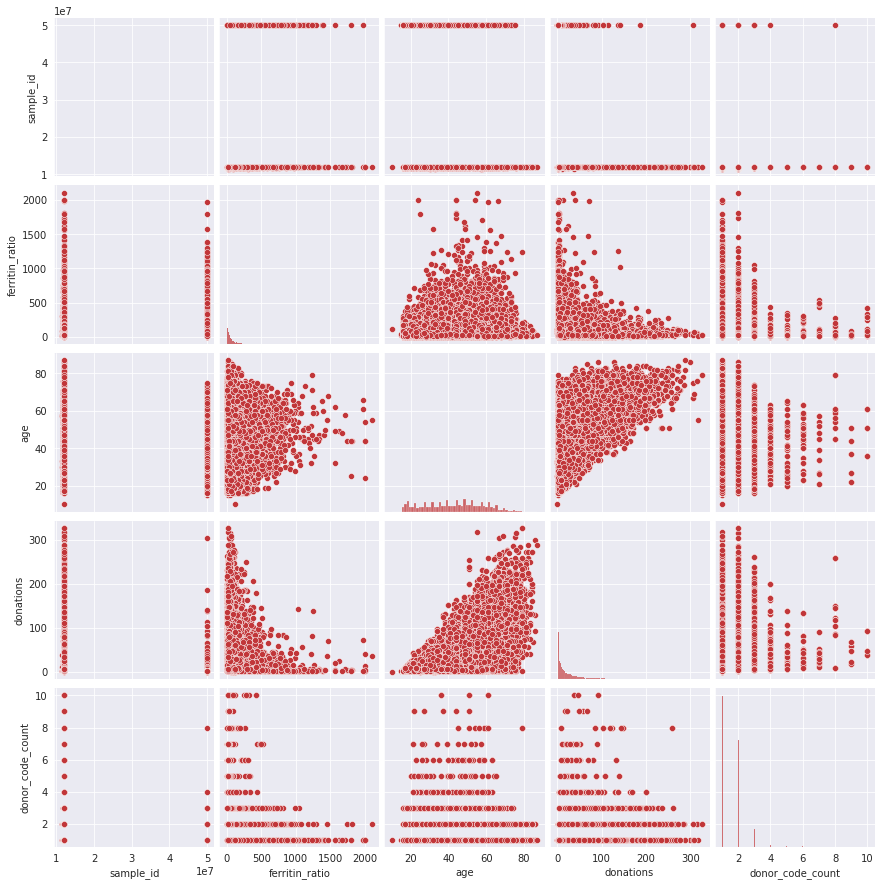

In [59]:
sns.pairplot(df2)

### DIFFERENCE IN FERRITIN RATIO BETWEEN DONATIONS

In [60]:
# find donor_codes that appear more than once in dataframe
duplicate = df2[df2.duplicated('donor_code', keep=False)]

# sort donor_codes alphabetically
duplicate = duplicate.sort_values(by=['donor_code'])

duplicate

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
12800,11993052,ABASSB00010,33.1,1.0,O POS,57.0,LS2,2022-02-22,61.0,normal,2
13949,12030385,ABASSB00010,39.1,1.0,O POS,57.0,LS2,2022-06-21,61.0,normal,2
27336,12006314,ABASSL00010,125.0,2.0,B POS,24.0,FTW,2022-03-18,6.0,normal,2
47441,12016835,ABASSL00010,76.4,4.0,B POS,24.0,FTW,2022-05-23,6.0,normal,2
39552,12016184,ABBOTA00020,166.0,3.0,O POS,56.0,ABK,2022-05-03,86.0,normal,3
...,...,...,...,...,...,...,...,...,...,...,...
22010,11983671,ZWIEGJA0010,18.7,2.0,B POS,66.0,EAW,2022-03-17,122.0,normal,2
27249,11983742,ZWIEGR00010,18.1,2.0,O POS,60.0,BSP,2022-03-10,28.0,normal,2
52243,12010739,ZWIEGR00010,23.3,4.0,O POS,60.0,BSP,2022-05-05,28.0,normal,2
15371,12024019,ZWIEGRJ0010,11.7,1.0,O POS,37.0,BEP,2022-05-31,46.0,low,2


In [61]:
duplicate.groupby(["donor_code",'date_bled'])["ferritin_ratio"].value_counts()


donor_code   date_bled   ferritin_ratio
ABASSB00010  2022-02-22  33.1              1
             2022-06-21  39.1              1
ABASSL00010  2022-03-18  125.0             1
             2022-05-23  76.4              1
ABBOTA00020  2022-02-23  82.1              1
                                          ..
ZWIEGJA0010  2022-05-19  21.5              1
ZWIEGR00010  2022-03-10  18.1              1
             2022-05-05  23.3              1
ZWIEGRJ0010  2022-03-24  16.7              1
             2022-05-31  11.7              1
Name: ferritin_ratio, Length: 25309, dtype: int64

In [62]:
df23 = duplicate.groupby(["donor_code", 'race', 'date_bled', 'clinic_code'])["ferritin_ratio"].value_counts()

In [63]:
duplicate["donor_code"].value_counts().head()


MUSAST00010    10
CLOETSJ0070    10
WILCONP0010    10
SCHRORA0010     9
WELLSM00020     9
Name: donor_code, dtype: int64

In [64]:
df23.loc['WILCONP0010']

race  date_bled   clinic_code  ferritin_ratio
1.0   2022-02-25  MPC          18.5              1
      2022-03-11  MPC          21.0              1
      2022-03-25  MPC          21.2              1
2.0   2022-04-08  KPC          24.5              1
      2022-06-24  KPC          28.0              1
3.0   2022-05-13  KPC          22.7              1
      2022-05-27  KPC          23.6              1
      2022-06-10  KPC          28.5              1
4.0   2022-04-29  KPC          29.9              1
      2022-07-08  KPC          24.8              1
Name: ferritin_ratio, dtype: int64

In [65]:
difference = duplicate.groupby("donor_code")["ferritin_ratio"].diff()
difference = difference.dropna()

In [66]:
difference.index

Int64Index([13949, 47441, 23188, 36569, 18064, 27993, 11997, 17285,  8863,
            12189,
            ...
            25865, 53554,   243, 54622, 48338,  4834,  4488, 22010, 52243,
             5123],
           dtype='int64', length=13483)

In [67]:
dup_diff = duplicate.merge(difference, left_index=True, right_index=True)
dup_diff

,sample_id,donor_code,ferritin_ratio_x,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count,ferritin_ratio_y
13949,12030385,ABASSB00010,39.1,1.0,O POS,57.0,LS2,2022-06-21,61.0,normal,2,6.0
47441,12016835,ABASSL00010,76.4,4.0,B POS,24.0,FTW,2022-05-23,6.0,normal,2,-48.6
23188,12038771,ABBOTA00020,131.0,2.0,O POS,56.0,HAR,2022-07-06,86.0,normal,3,-35.0
36569,11992563,ABBOTA00020,82.1,3.0,O POS,56.0,HAR,2022-02-23,86.0,normal,3,-48.9
18064,11943020,ABBOTE00010,48.7,2.0,O NEG,45.0,EAW,2022-03-17,79.0,normal,2,-4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4834,12037470,ZURNAM00010,74.2,1.0,O POS,25.0,FGD,2022-06-25,28.0,normal,2,-16.7
4488,11994507,ZWANEAA0010,53.5,1.0,A POS,26.0,CHG,2022-03-01,7.0,normal,2,16.0
22010,11983671,ZWIEGJA0010,18.7,2.0,B POS,66.0,EAW,2022-03-17,122.0,normal,2,-2.8
52243,12010739,ZWIEGR00010,23.3,4.0,O POS,60.0,BSP,2022-05-05,28.0,normal,2,5.2


In [68]:
# sns.pairplot(clean_df_therap)

# sns.pairplot(clean_df_non_therap)

# sns.histplot(data=clean_df_non_therap, x='ferritin_ratio', hue='race', multiple='stack', log_scale=True )

#sns.histplot(data=clean_df_non_therap, x='ferritin_cat', bins=100)
    
# sns.relplot(x="age", y="ferritin_ratio", hue="race", alpha=.5, palette="muted", height=6, data=clean_df_non_therap)

In [69]:
df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,very high,1
4,50011361,COLLIS00290,1222.0,1.0,O POS,32.0,NC5,2022-03-04,1.0,very high,1
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,very high,1
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,very high,2
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,very high,2


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55111 entries, 1 to 59580
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sample_id         55111 non-null  int64         
 1   donor_code        55111 non-null  object        
 2   ferritin_ratio    55111 non-null  float64       
 3   race              55111 non-null  object        
 4   group_rh          55111 non-null  object        
 5   age               55111 non-null  float64       
 6   clinic_code       55111 non-null  object        
 7   date_bled         55111 non-null  datetime64[ns]
 8   donations         55111 non-null  float64       
 9   ferritin_cat      55111 non-null  object        
 10  donor_code_count  55111 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 7.1+ MB


<AxesSubplot:xlabel='age', ylabel='donations'>

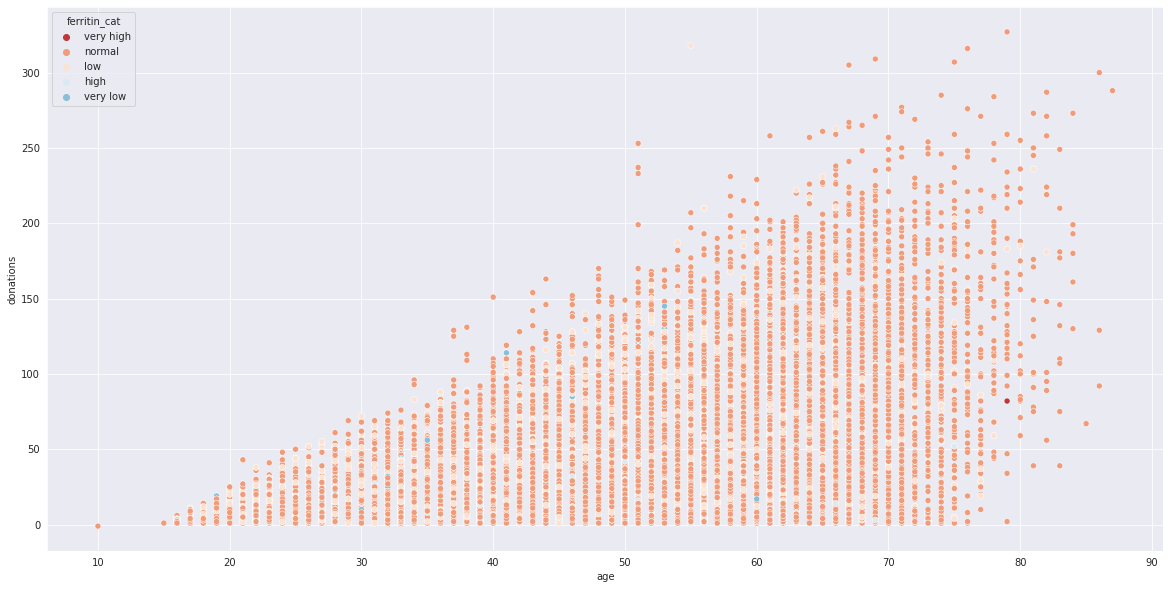

In [71]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x='age', y='donations', hue='ferritin_cat', data=df2)

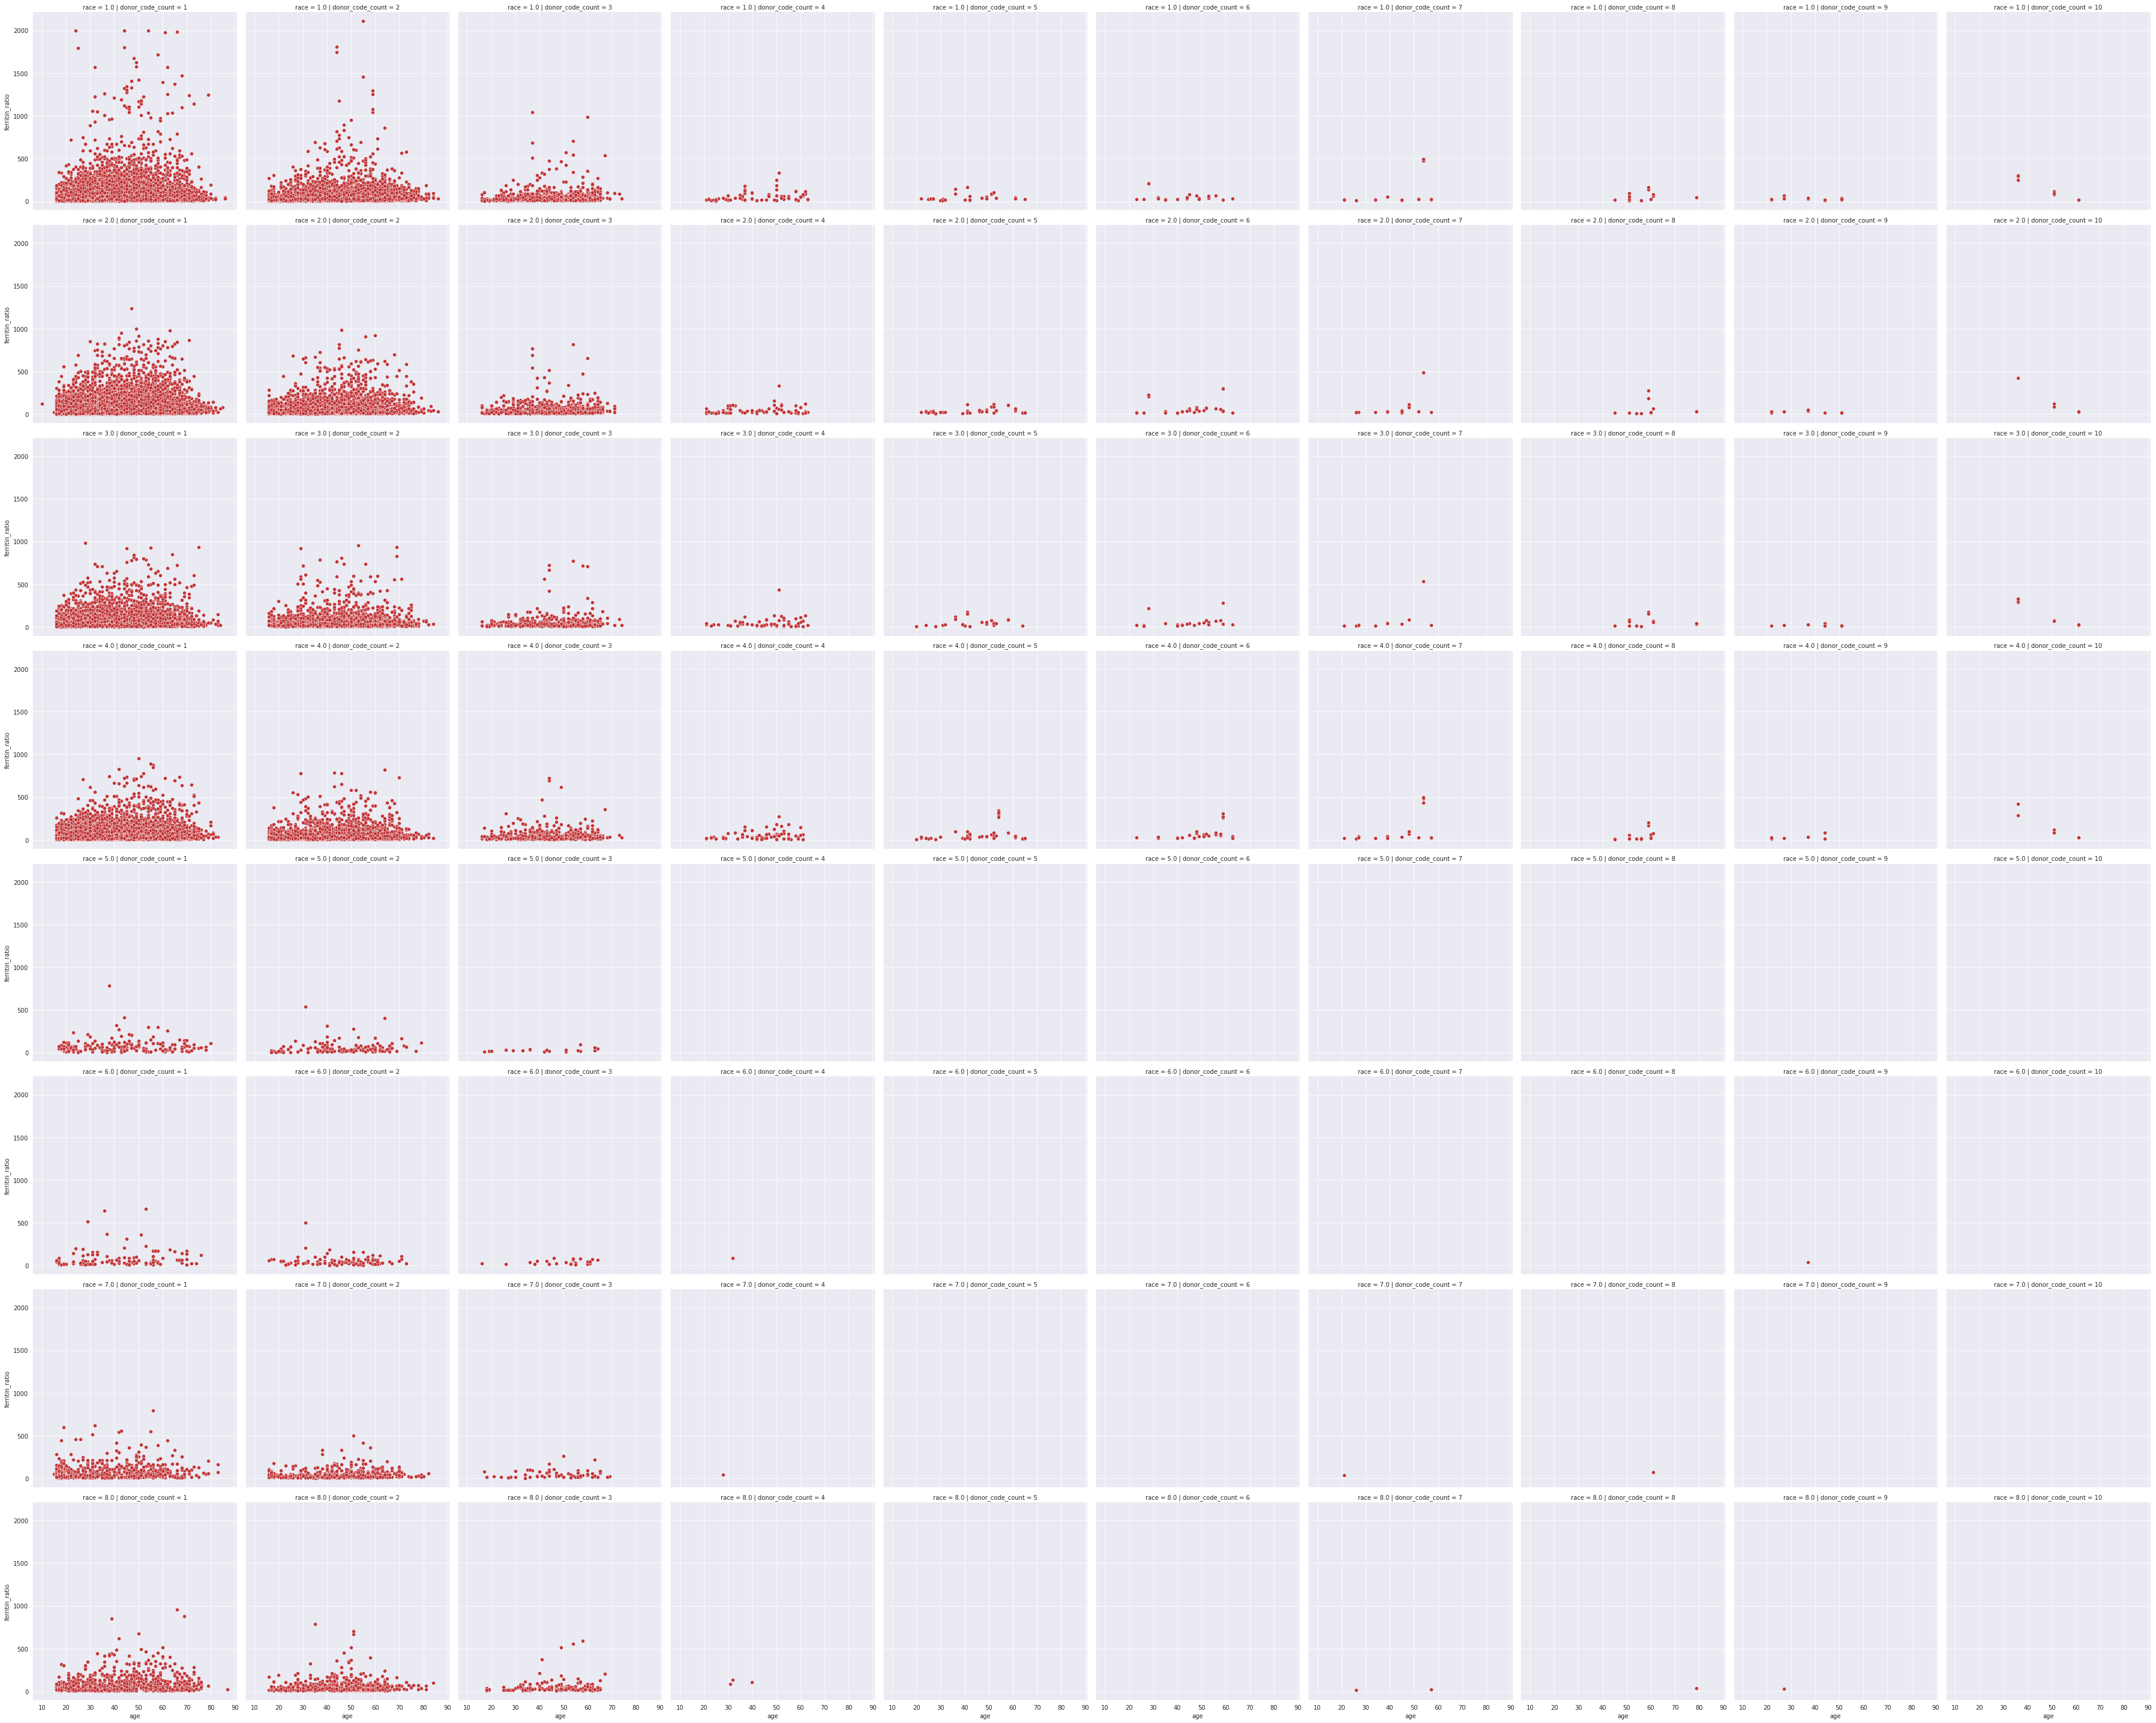

In [72]:
sns.relplot(x='age', y='ferritin_ratio', kind='scatter', row='race',col='donor_code_count', data=df2)

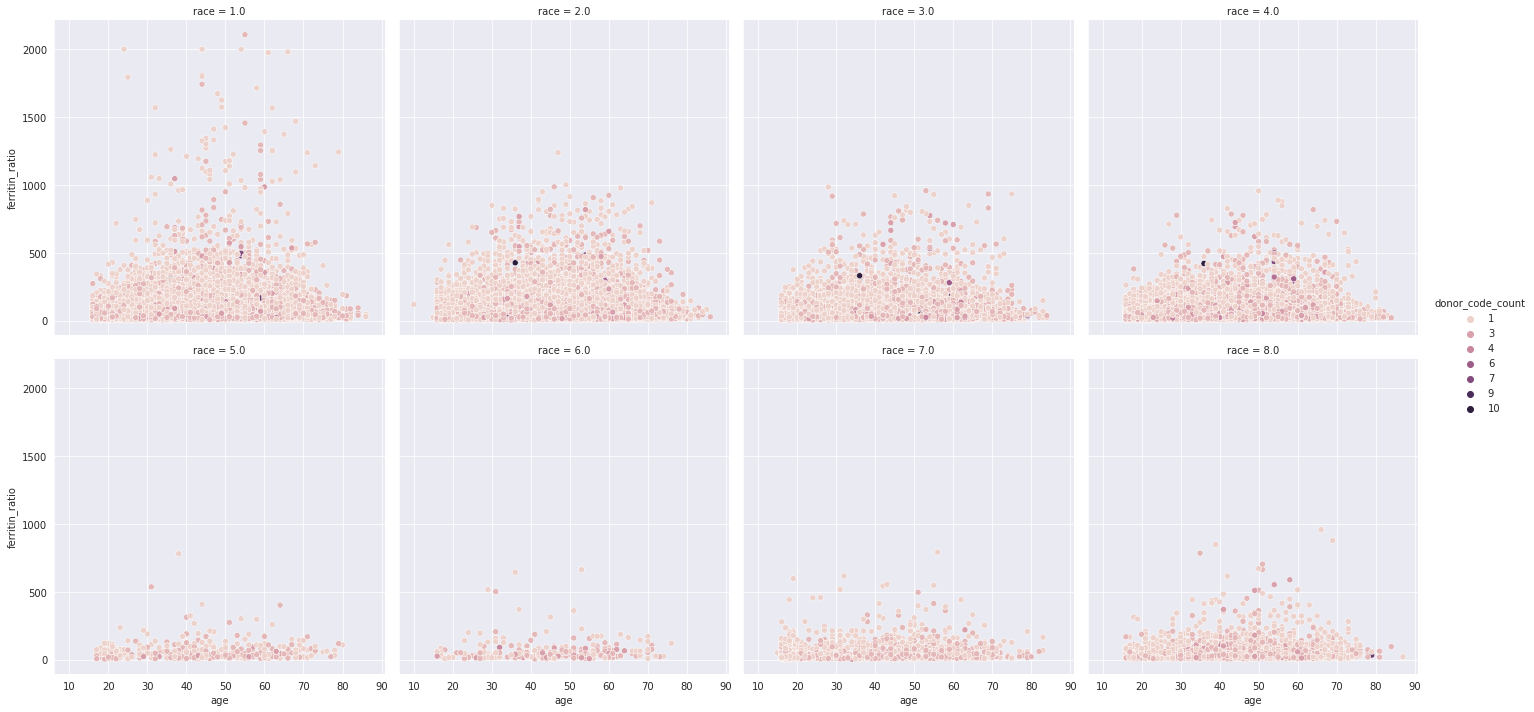

In [73]:
sns.relplot(x='age', y='ferritin_ratio', kind='scatter', hue='donor_code_count', col='race',col_wrap=4, data=df2)

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55111 entries, 1 to 59580
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sample_id         55111 non-null  int64         
 1   donor_code        55111 non-null  object        
 2   ferritin_ratio    55111 non-null  float64       
 3   race              55111 non-null  object        
 4   group_rh          55111 non-null  object        
 5   age               55111 non-null  float64       
 6   clinic_code       55111 non-null  object        
 7   date_bled         55111 non-null  datetime64[ns]
 8   donations         55111 non-null  float64       
 9   ferritin_cat      55111 non-null  object        
 10  donor_code_count  55111 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 7.1+ MB


In [75]:
df2.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,very high,1
4,50011361,COLLIS00290,1222.0,1.0,O POS,32.0,NC5,2022-03-04,1.0,very high,1
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,very high,1
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,very high,2
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,very high,2


In [76]:
df2.groupby('donor_code')['date_bled'].transform(lambda x: x)

1       2022-05-27
4       2022-03-04
5       2022-06-01
6       2022-03-02
8       2022-03-14
           ...    
59575   2022-03-31
59576   2022-03-31
59577   2022-03-31
59578   2022-04-20
59580   2022-04-20
Name: date_bled, Length: 55111, dtype: datetime64[ns]

In [77]:
df_Y = df2.sort_values(by=['donor_code', 'date_bled'])
df_Y

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count
6467,12025318,AARISD00010,67.40,1.0,A POS,17.0,AMT,2022-05-18,2.0,normal,1
14645,50033936,AASVOT00010,82.50,1.0,B POS,30.0,HGI,2022-06-10,1.0,normal,1
55432,12005548,ABADEL00010,7.39,4.0,AB POS,19.0,FTW,2022-03-12,9.0,low,1
39701,12026381,ABADES00060,34.00,3.0,B POS,51.0,FTW,2022-06-02,12.0,normal,1
12800,11993052,ABASSB00010,33.10,1.0,O POS,57.0,LS2,2022-02-22,61.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...
7883,12009882,ZWIEGJA0010,21.50,1.0,B POS,66.0,EAW,2022-05-19,122.0,normal,2
27249,11983742,ZWIEGR00010,18.10,2.0,O POS,60.0,BSP,2022-03-10,28.0,normal,2
52243,12010739,ZWIEGR00010,23.30,4.0,O POS,60.0,BSP,2022-05-05,28.0,normal,2
5123,12002112,ZWIEGRJ0010,16.70,1.0,O POS,37.0,NC4,2022-03-24,46.0,normal,2


In [93]:
date_diff = df_Y.groupby('donor_code')['date_bled'].diff().dt.days.fillna(0, downcast='infer')

In [94]:
df_Y['date_diff'] = date_diff

In [114]:
df_Y.groupby(['donor_code','date_diff'])["ferritin_ratio"].value_counts()

donor_code   date_diff  ferritin_ratio
AARISD00010  0          67.40             1
AASVOT00010  0          82.50             1
ABADEL00010  0          7.39              1
ABADES00060  0          34.00             1
ABASSB00010  0          33.10             1
                                         ..
ZWIEGJA0010  63         21.50             1
ZWIEGR00010  0          18.10             1
             56         23.30             1
ZWIEGRJ0010  0          16.70             1
             68         11.70             1
Name: ferritin_ratio, Length: 55110, dtype: int64

In [115]:
pd.set_option('display.max_rows', 200)
df_Y['date_diff'].value_counts()

0      41628
56      2624
63      2375
70       935
77       628
84       548
91       544
98       363
14       306
57       218
61       206
62       170
64       169
58       169
126      168
60       163
59       161
112      150
119      145
105      142
69       134
65       119
66       113
72       113
76       112
68       103
67        96
78        95
82        95
71        92
73        89
75        84
92        79
74        77
79        75
21        73
85        72
97        69
15        61
99        58
90        56
83        56
88        52
80        52
81        51
87        48
89        47
93        44
86        42
96        41
102       39
94        39
95        38
103       38
104       36
107       33
101       32
100       31
108       31
28        30
113       28
18        26
133       26
106       23
111       23
17        23
118       22
16        21
20        19
115       19
140       19
110       19
117       19
55        19
19        18
116       17
109       17

In [120]:
df_Y[df_Y['date_diff'] > 0]

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,ferritin_cat,donor_code_count,date_diff
13949,12030385,ABASSB00010,39.1,1.0,O POS,57.0,LS2,2022-06-21,61.0,normal,2,119
47441,12016835,ABASSL00010,76.4,4.0,B POS,24.0,FTW,2022-05-23,6.0,normal,2,66
39552,12016184,ABBOTA00020,166.0,3.0,O POS,56.0,ABK,2022-05-03,86.0,normal,3,69
23188,12038771,ABBOTA00020,131.0,2.0,O POS,56.0,HAR,2022-07-06,86.0,normal,3,64
7609,12009890,ABBOTE00010,53.4,1.0,O NEG,45.0,EAW,2022-05-19,79.0,normal,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...
4834,12037470,ZURNAM00010,74.2,1.0,O POS,25.0,FGD,2022-06-25,28.0,normal,2,93
57900,12017508,ZWANEAA0010,37.5,8.0,A POS,26.0,CHG,2022-04-26,7.0,normal,2,56
7883,12009882,ZWIEGJA0010,21.5,1.0,B POS,66.0,EAW,2022-05-19,122.0,normal,2,63
52243,12010739,ZWIEGR00010,23.3,4.0,O POS,60.0,BSP,2022-05-05,28.0,normal,2,56


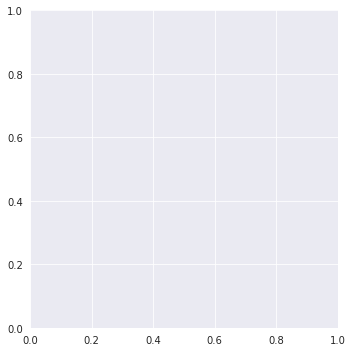

In [119]:
sns.displot(df_Y['date_diff'].drop())

In [79]:
df_X = pd.DataFrame(df2.groupby(['donor_code', 'date_bled']).transform())

TypeError: transform() missing 1 required positional argument: 'func'

In [ ]:
df_X.iloc[0][0][1]

In [ ]:
df_Z = df_Y[df_Y['donor_code_count'] > 1]

In [ ]:
df_Z.set_index('donor_code', inplace=True)

In [ ]:
df_Z['date_bled'].loc['ABASSB00010'][0]

In [ ]:
df_Z.groupby('donor_code')['date_bled'].transform(lambda x: x)

In [ ]:
test_df = df_Y.head(50)
# test_df.set_index('donor_code', inplace=True)

In [ ]:
test_df.columns

In [ ]:
test_df = test_df[['donor_code', 'date_bled', 'donor_code_count']]

In [ ]:
test_df.groupby('donor_code')['date_bled'].apply(lambda x: tlist.append(x) for x in test_df['date_bled'])

In [ ]:
big_dict ={}
global code
code=None

for donor in test_df.index:
#     global code
    global time_list
    global count
    
    if donor == code:
        count +=1
        time_list.append(test_df['date_bled'].loc[code][count])
        big_dict[code] = time_list
        
        print('equal', time_list)
        
    elif donor != code:
        code = donor
        time_list=[]
        count=0
        time_list.append(test_df['date_bled'].loc[code][count])
        big_dict[code] = time_list
        print('not equal', time_list)
    

In [ ]:
big_dict.keys()

In [ ]:
df_Y[df_Y['donor_code'] == 'AARISD00010']['date_bled']

In [ ]:
df_Y['donor_code'].loc['AARISD00010']

In [ ]:
df_Y

In [ ]:
df_Y.groupby('donor_code')['date_bled'].transform()